# Profiles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [3]:
i = 29
# Ineteresting ones 9-10-30

(233, 256, 256)


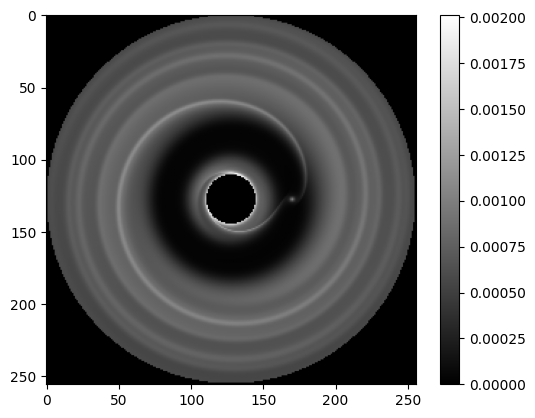

In [4]:
# Here goes the npy file with the symulation density profiles
img = np.load("../profiles/dens_test.npy")
print(img.shape)
plt.imshow(img[i], cmap="grey")
plt.colorbar()
plt.show()

# Simulation radial profile

(256, 256)


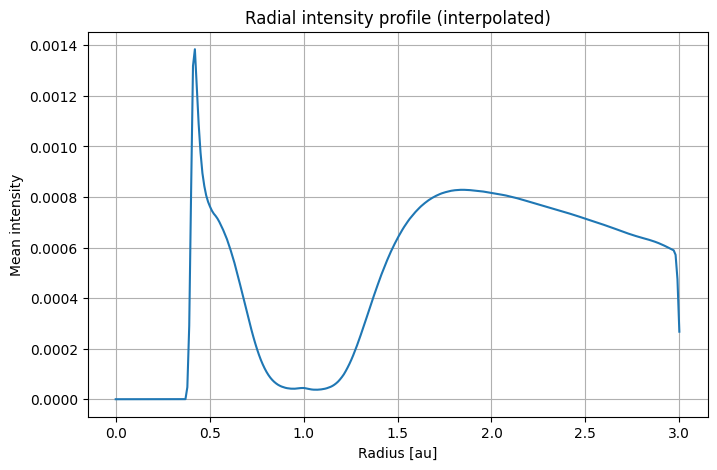

In [5]:
# Here goes the npy file with the symulation density profiles
intensity_tot = np.load("../profiles/dens_test.npy")
intensity = intensity_tot[i]
print(intensity.shape)

ny, nx = intensity.shape
x = np.linspace(-3, 3, nx)
y = np.linspace(-3, 3, ny)
xx, yy = np.meshgrid(x, y)

# Coordinate polari
r = np.sqrt(xx**2 + yy**2)
theta = np.arctan2(yy, xx)

# Flatten
points = np.vstack((xx.flatten(), yy.flatten())).T
values = intensity.flatten()

# Nuova griglia polare (r, θ)
r_i = np.linspace(0, 3, 300)
theta_i = np.linspace(-np.pi, np.pi, 360)
rr, tt = np.meshgrid(r_i, theta_i)

# Converti griglia polare in x, y
xi = rr * np.cos(tt)
yi = rr * np.sin(tt)

# Interpola
grid_intensity = griddata(points, values, (xi, yi), method='linear', fill_value=0)

# Profilo radiale = media lungo θ
profile = np.mean(grid_intensity, axis=0)

# Normalizza
# profile = profile / np.nanmax(profile)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(r_i, profile)
plt.xlabel("Radius [au]")
plt.ylabel("Mean intensity")
plt.title("Radial intensity profile (interpolated)")
plt.grid(True)
plt.show()